In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import os

In [33]:
# path = '/home/investigator/mariandbt/python/data/'
path = '/home/investigator/mariandbt/python_old/data/'
# path = path + '20230119/'
path = path + '20230124/'

# filename = os.path.join(path, 'Acq_LED1.07V_PMT5.5V_gan0.8.txt')
filename = os.path.join(path, 'pmt_with_fibers_dig2-192.168.0.254-04.txt')

with open(filename) as f:
    data_102 = np.loadtxt(f)

In [34]:
np.shape(data_102)

(4213000, 4)

In [35]:
len(np.where(data_102[:, 0] == 0.)[0]) #, data_pmt_led[:, 0].max()

4213

In [36]:
np.where(data_102[:, 0] == 0.)[0][1998]

1998000

note: the way the data is stored when using only ONE FILE is the following:
- column 0 is just an index (x-axis if you  will), while columns 1, 2, 3 correspond to data from differnt channels
- each column stores data from MULTIPLE FRAMES
- each frame has 1000 points, so in column 0 you can see how after 999 it resets to 0 when the frame changes

In [37]:
data_slice = data_102[1000*2:1000*3, :]
data_slice[0]

array([ 0.      , -3.54009 ,  0.396735,  1.89212 ])

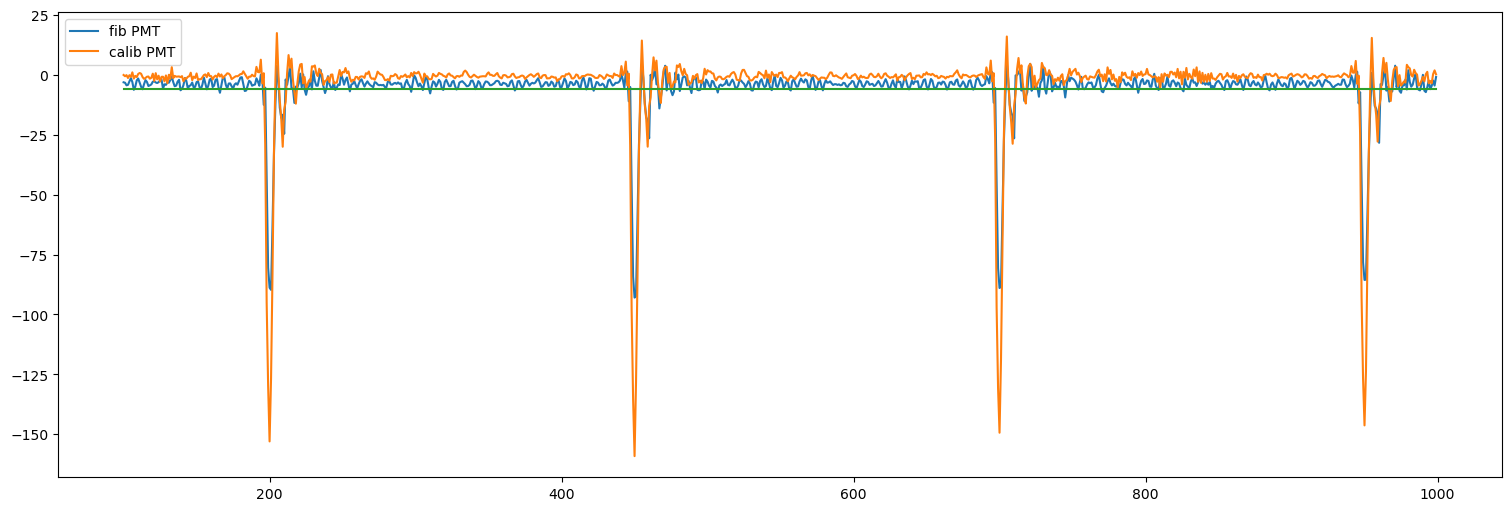

In [71]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

frame = 8
x_ax = data_102[1000*frame + 100:1000*(frame + 1), 0]
    
# for i in range(1, 4):
#     ax.plot(data_pmt_led[:1000, 0], data_pmt_led[:1000, i])
# #     ax.set_aspect('equal')

# ax.plot(data_102[:1000, 0], data_102[:1000, 1], label = 'DAQ')
# ax.plot(data_102[:1000, 0], data_102[:1000, 2], label = 'PMT')
# ax.plot(x_ax, data_102[1000*frame:1000*frame + 500, 1], label = 'DAQ')
# ax.plot(x_ax, data_102[1000*frame + 100:1000*frame + 300, 2], label = 'fib PMT')
# ax.plot(x_ax, data_102[1000*frame + 100:1000*frame + 300, 3], label = 'calib PMT')
ax.plot(x_ax, data_102[1000*frame + 100:1000*(frame + 1), 2], label = 'fib PMT')
ax.plot(x_ax, data_102[1000*frame + 100:1000*(frame + 1), 3], label = 'calib PMT')
ax.plot(x_ax, -6*np.ones(len(x_ax)))
ax.legend(loc = 'best')

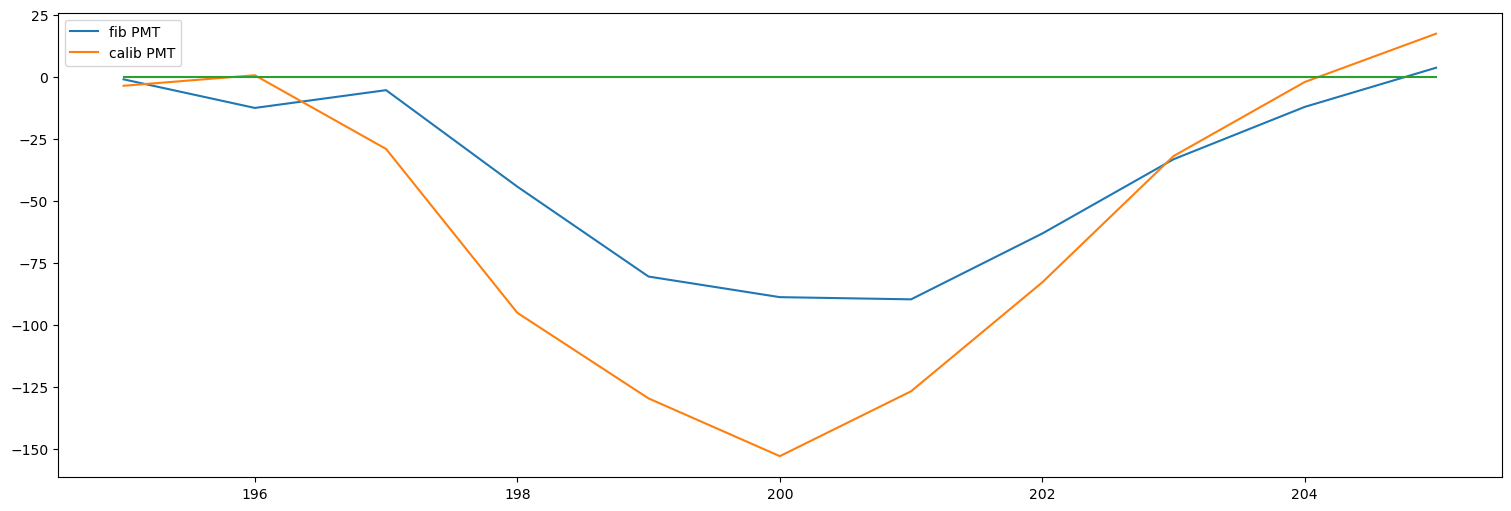

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

frame = 8
x_ax = data_102[1000*frame + 195:1000*frame + 206, 0]
    

ax.plot(x_ax, data_102[1000*frame + 195:1000*frame + 206, 2], label = 'fib PMT')
ax.plot(x_ax, data_102[1000*frame + 195:1000*frame + 206, 3], label = 'calib PMT')
# ax.plot(x_ax, -6*np.ones(len(x_ax)))
ax.plot(x_ax, np.zeros(len(x_ax)))
ax.legend(loc = 'best')

In [78]:
x_ax = data_102[1000*frame + 100:1000*frame + 300, 0]
# x_ax = data_102[1000*frame + 195:1000*frame + 206, 0]
data_slice_fib_pmt = data_102[1000*frame + 100:1000*frame + 300, 2]
data_slice_fib_pmt = data_102[1000*frame + 100:1000*frame + 300, 3]
# data_slice_fib_pmt = data_102[1000*frame + 195:1000*frame + 206, 2]

In [79]:
np.trapz(data_slice_fib_pmt, x=x_ax)
# np.trapz(data_slice_fib_pmt, dx=1e-6)

-825.3136539500001

In [80]:
# x_ax = data_102[1000*frame + 100:1000*frame + 300, 0]
x_ax = data_102[1000*frame + 195:1000*frame + 206, 0]
# data_slice_fib_pmt = data_102[1000*frame + 100:1000*frame + 300, 2]
data_slice_fib_pmt = data_102[1000*frame + 195:1000*frame + 206, 2]
data_slice_fib_pmt = data_102[1000*frame + 195:1000*frame + 206, 3]

In [81]:
np.trapz(data_slice_fib_pmt, x=x_ax)
# np.trapz(data_slice_fib_pmt, dx=1e-6)

-643.014166

In [82]:
# x_ax = data_102[1000*frame + 100:1000*frame + 300, 0]
x_ax = data_102[1000*frame:1000*frame + 500, 0]
# data_slice_fib_pmt = data_102[1000*frame + 100:1000*frame + 300, 2]
data_slice_fib_pmt = data_102[1000*frame:1000*frame + 500, 2]
data_slice_fib_pmt = data_102[1000*frame:1000*frame + 500, 3]

In [83]:
np.trapz(data_slice_fib_pmt, x=x_ax)
# np.trapz(data_slice_fib_pmt, dx=1e-6)

-1707.8497638

In [76]:
x_ax = data_102[1000*frame + 100:1000*(frame + 1), 0]
# data_slice_fib_pmt = data_102[1000*frame + 100:1000*(frame + 1), 2]
data_slice_fib_pmt = data_102[1000*frame + 100:1000*(frame + 1), 3]


In [77]:
np.trapz(data_slice_fib_pmt, x=x_ax)/4
# np.trapz(data_slice_fib_pmt, dx=1e-6)

-821.6903515125

In [87]:
np.shape(data_102), data_102[1000*4212]

((4213000, 4), array([ 0.      , -6.95811 , -0.335698,  2.28885 ]))

In [120]:
# fig, ax = plt.subplots(1,1, constrained_layout=True)

# frame = 50
frame_max = 4212
fit_range = 5

peak_integr = []
peak_integr_pos = []

for frame in range(frame_max):
    
    data_slice = data_102[1000*(frame):1000*(frame + 1), 2]
    # ax.plot(data_slice)


    for i in range(1, 4):

        offset = 200*i + int(np.where(data_slice[200*i:200*(i+1)] == data_slice[200*i:200*(i+1)].min())[0][0])
        data_region = data_slice[offset - fit_range : offset + fit_range]
        x_ax = range(len(data_region))

        integr = np.trapz(data_region, x=x_ax)

        peak_integr.append(integr)
        peak_integr_pos.append([integr, frame, i])


peak_integr = np.array(peak_integr)
peak_integr_pos = np.array(peak_integr_pos)

peak_integr.mean()
# peak_integr
# peak_integr_pos

-410.53632180726896

In [109]:
np.where(data_slice[200*i:200*(i+1)] == data_slice[200*i:200*(i+1)].min())[0][0]

100

-422.2985829833333

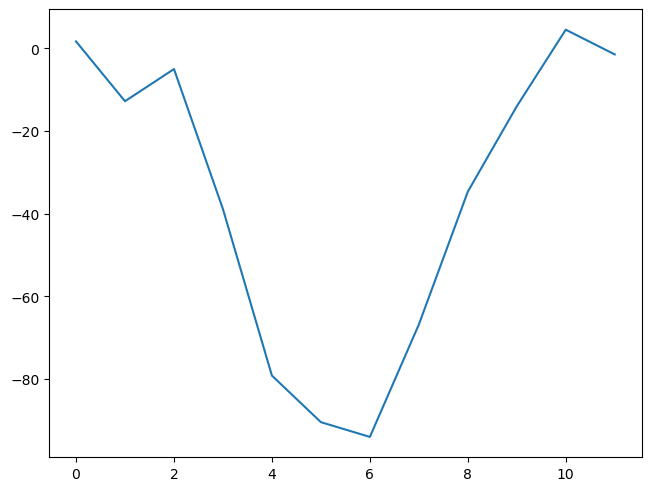

In [125]:
fig, ax = plt.subplots(1,1, constrained_layout=True)

frame = 237
fit_range = 6

peak_integr = []
peak_integr_pos = []

    
data_slice = data_102[1000*(frame):1000*(frame + 1), 2]
# ax.plot(data_slice)


for i in range(1, 4):

    offset = 200*i + int(np.where(data_slice[200*i:200*(i+1)] == data_slice[200*i:200*(i+1)].min())[0])
    data_region = data_slice[offset - fit_range : offset + fit_range]
    x_ax = range(len(data_region))

    integr = np.trapz(data_region, x=x_ax)

    peak_integr.append(integr)
    peak_integr_pos.append([integr, frame, i])

    

peak_integr = np.array(peak_integr)
peak_integr_pos = np.array(peak_integr_pos)

ax.plot(data_region)
peak_integr.mean()
# integr